# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

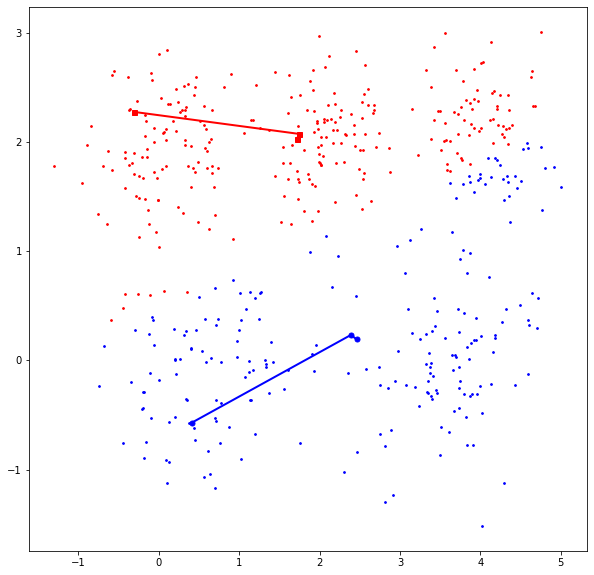

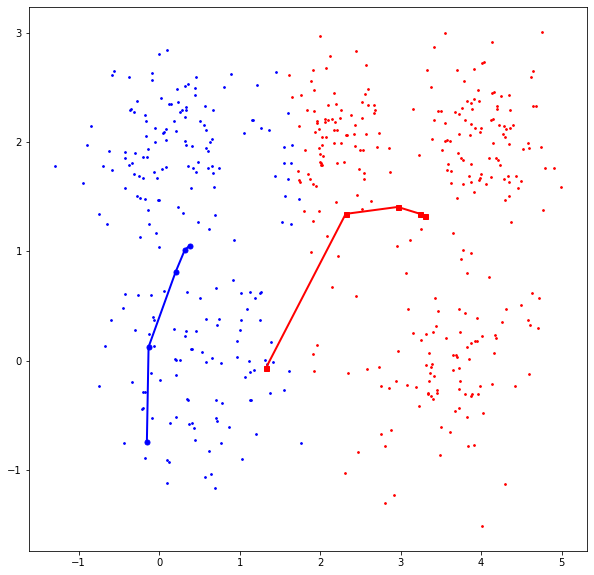

In [4]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want

idx, ctrs, iter_ctrs = kmeans(x, k)
dist = sum([np.sum(np.linalg.norm(x[idx==i] - ctrs[i])) for i in range(k)])

max_idx = min_idx = idx
max_ctrs = min_ctrs = ctrs
max_iter_ctrs = min_iter_ctrs = iter_ctrs
max_dist = min_dist = dist 

for i in range(999):
    idx, ctrs, iter_ctrs = kmeans(x, k)
    dist = sum([np.sum(np.linalg.norm(x[idx==i] - ctrs[i])) for i in range(k)])

    if dist > max_dist:
        max_dist = dist
        max_idx = idx
        max_ctrs = ctrs
        max_iter_ctrs = iter_ctrs
    if dist < min_dist:
        min_dist = dist
        min_idx = idx
        min_ctrs = ctrs
        min_iter_ctrs = iter_ctrs
        
kmeans_plot(x, max_idx, max_ctrs, max_iter_ctrs)
kmeans_plot(x, min_idx, min_ctrs, min_iter_ctrs)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

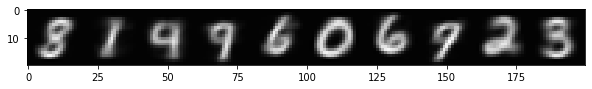

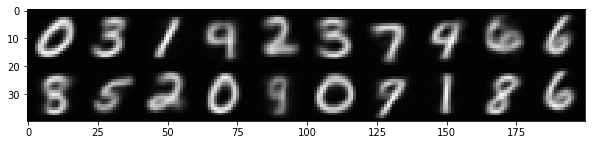

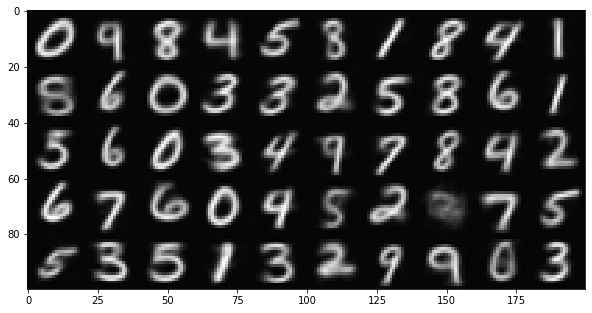

In [5]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

In [12]:
import kmeans
from matplotlib.pyplot import imread
img = imread('sample0.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer

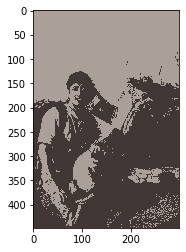

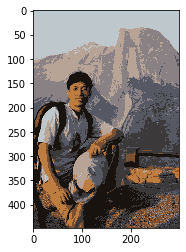

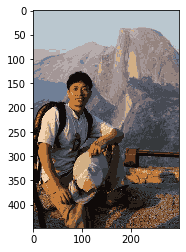

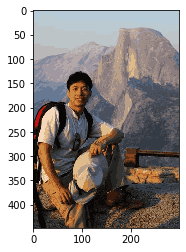

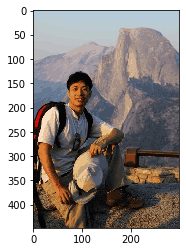

In [14]:
for k in [2, 8, 16, 32, 64]:
    idx, ctrs, _ = kmeans.kmeans(fea, k)
    fea_c = np.zeros_like(fea)
    for i in range(fea.shape[0]):
        fea_c[i] = ctrs[idx[i]]
    
    plt.imshow(fea_c.reshape(img.shape).astype(np.uint8))
    plt.show()